# Effects of Debt-to-Income Ratio, Monthly Loan Payments, Stated Monthly Income and Occupation on Credit Score

## Investigation Overview

In this data analytics project, I was interested in variables that could potentially predict one's credit score. The variables that are in focus for investigation in relation to credit scores are the debt-to-income ratio, monthly loan payments, stated monthly income and occupation.

## Dataset Overview
This dataset contains data about loans and borrowers from Prosper Marketplace, Inc., which is San Francisco, California-based company that specializes in peer-to-peer lending.  It has 113,937 entries with 81 variables. I needed to drop 45,676 entries in order to ensure accuracy of data analysis and better plotting results. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

loans = pd.read_csv('clean_loans.csv')

## Distribution of Credit Scores

The credit scores are unimodal and normally distributed, indicating that most credit scores are close to the mean in comparison to outliers. In this dataset, the most frequently occurring credit score 679 while the lowest is 559.

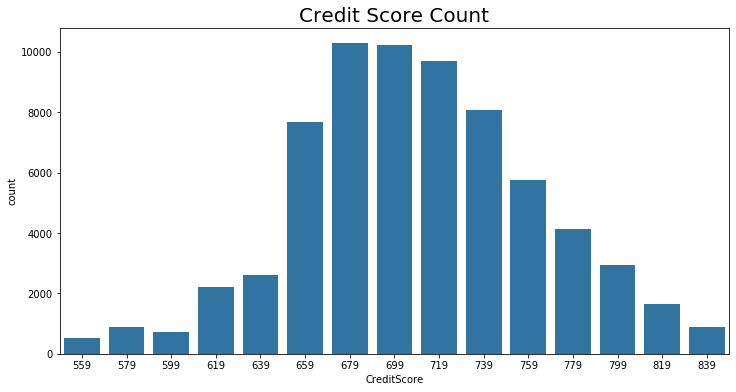

In [2]:
#creating a countplot
base_color = sns.color_palette()[0]
plt.figure(figsize=(12,6))
sns.countplot(data=loans, x='CreditScore', color=base_color)
plt.title('Credit Score Count', fontsize=20);

## Relationship Between Credit Scores and Occupation

Most of the occupations have normally distributed credit scores, albeit their means differ depending on the occupation. Teachers, Analysts, Computer Programmers, Executives and Accountants/CPAs tend to have higher average credit scores in comparison to the rest of the top 10 occupations.

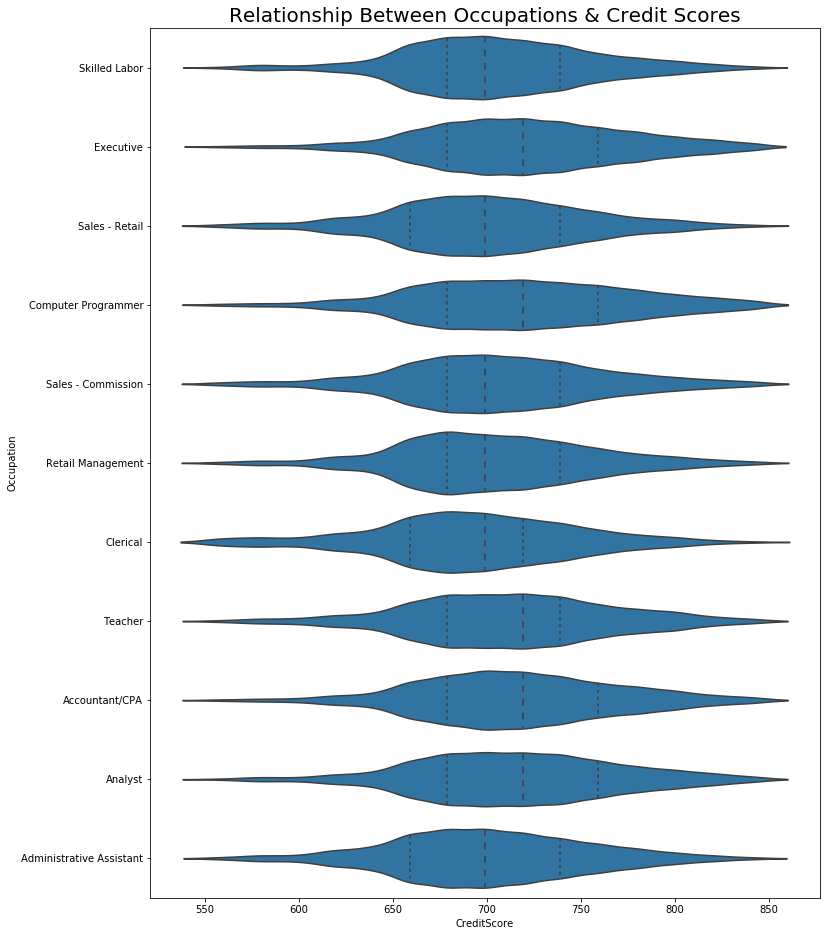

In [3]:
#sorting only top 10 occupations, excluding 'Other Professionals'
occupations =loans.Occupation.value_counts()[0:11]

#creating a list of occupations
occupation_list = []
for i in occupations.index:
    occupation_list.append(i)
    
#creating a dataframe that only has the top 20 under occupation
occupation_df = loans[loans['Occupation'].isin(occupation_list)]

#plotting
base_color = sns.color_palette()[0]
plt.figure(figsize=(12,16))
sns.violinplot(data=occupation_df, x='CreditScore', y='Occupation', color=base_color, inner='quartile')
plt.title('Relationship Between Occupations & Credit Scores', fontsize=20);

## Relationship Between Credit Scores and Debt-to-Income Ratio

It appears that credit scores and debt-to-income ratios have a negative relationship wherein as the debt-to-income ratio increases, the credit score decrease, and vice-versa.

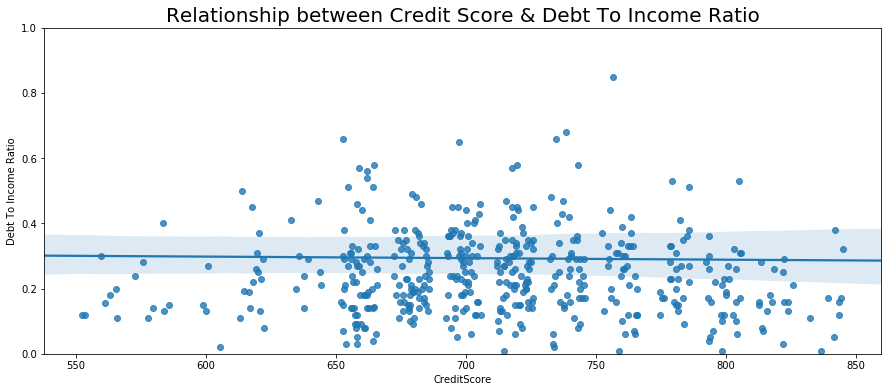

In [4]:
#creating a sample size for credit scores
samples = np.random.choice(loans.shape[0], 500, replace=False)
loans_samp = loans.loc[samples,:]

#plotting
plt.figure(figsize=(15,6))
base_color = sns.color_palette()[0]
sns.regplot(data=loans_samp, x='CreditScore', y='DebtToIncomeRatio',color=base_color,  x_jitter=7)
plt.ylim(0,1)
plt.xlabel('CreditScore')
plt.ylabel('Debt To Income Ratio')
plt.title('Relationship between Credit Score & Debt To Income Ratio', fontsize=20);

## Relationship Between Credit Scores and Monthly Loan Payments

The heat map shows a positive relationship between credit scores and monthly loan payments. Credit scores between 700-725 with a monthly loan payment of less than 500 is the highest in occurence. It is also indicative of the fact that majority of bororowers pay 250-750/month.

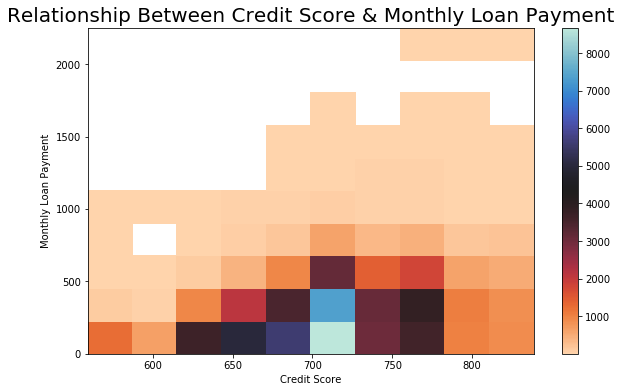

In [5]:
#Creating Violin Plots between Credit Score & Monthly Loan Payment

plt.figure(figsize=(10,6))
plt.hist2d(data=loans, x='CreditScore', y='MonthlyLoanPayment', cmin=0.09,cmap='icefire_r')
plt.colorbar()
plt.xlabel('Credit Score')
plt.ylabel('Monthly Loan Payment')
plt.title('Relationship Between Credit Score & Monthly Loan Payment', fontsize=20);

## Relationship Between Credit Scores and Monthly Income

According to the regression plot, albeit there is some obvious heteroskedestacity, Monthly Income and Credit Score have a positive relationship. I opted to limit the y-values up to 10,000 due to the severe outliers that make plotting less clear.

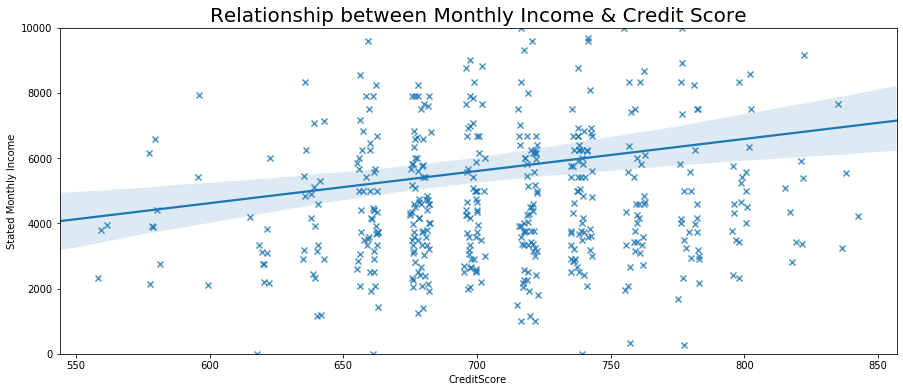

In [6]:
#creating function to transform data to plot regression line
#creating sample of 500 for clearer plotting
samples = np.random.choice(loans.shape[0], 500, replace = False)
loans_samp = loans.loc[samples,:]


plt.figure(figsize=(15,6))
sns.regplot(data=loans_samp, x='CreditScore', y='StatedMonthlyIncome',
            x_jitter=4, y_jitter=4,marker = 'x')
plt.ylim(0,10000)
plt.xlabel('CreditScore')
plt.ylabel('Stated Monthly Income')
plt.title('Relationship between Monthly Income & Credit Score', fontsize=20);

In [8]:
!jupyter nbconvert Project5-Explanatory.ipynb --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook Project5-Explanatory.ipynb to slides
Traceback (most recent call last):
  File "C:\Users\jpaui\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\jpaui\Anaconda3\lib\site-packages\jupyter_core\application.py", line 268, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\jpaui\Anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\jpaui\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 340, in start
    self.convert_notebooks()
  File "C:\Users\jpaui\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 510, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:\Users\jpaui\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 481, in convert_single_notebook
    output, resources = self.export_single_notebook(notebook_fil